<a href="https://colab.research.google.com/github/takuxp/bigdata_study/blob/main/5%ED%9A%8C_%EA%B8%B0%EC%B6%9C_%EC%9C%A0%ED%98%95(%EC%9E%91%EC%97%85%ED%98%952).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업형2

## [가격 예측] 중고 자동차
- 자동차 가격을 예측해주세요!


- 예측할 값(y): price
- 평가: RMSE (Root Mean Squared Error)
- data: train.csv, test.csv
- 제출 형식: result.csv파일을 아래와 같은 형식(수치형)으로 제출
~~~
pred
11000
20500
19610
...
11995
~~~

### 답안 제출 참고
- pd.read_csv('result.csv') 로 제출 코드 확인

In [ ]:
# 데이터 불러오기
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## EDA

In [ ]:
# 데이터 크기 확인
train.shape, test.shape

((3759, 9), (1617, 8))

In [ ]:
# 샘플 확인 (시험환경에서는 display 대신 print 활용)
display(train.head(3))
display(test.head(3))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,EcoSport,2017,10298,Manual,25013,Petrol,150,53.3,1.0
1,Focus,2016,10491,Manual,30970,Diesel,0,74.3,1.5
2,S-MAX,2017,13498,Manual,60200,Diesel,150,56.5,2.0


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,S-MAX,2016,Manual,23905,Diesel,125,56.5,2.0
1,Fiesta,2018,Manual,16895,Petrol,145,40.3,1.5
2,Kuga,2017,Manual,12109,Petrol,165,45.6,1.5


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3759 non-null   object 
 1   year          3759 non-null   int64  
 2   price         3759 non-null   int64  
 3   transmission  3759 non-null   object 
 4   mileage       3759 non-null   int64  
 5   fuelType      3759 non-null   object 
 6   tax           3759 non-null   int64  
 7   mpg           3759 non-null   float64
 8   engineSize    3759 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 264.4+ KB


In [ ]:
# 기초 통계값 확인
train.describe()

,year,price,mileage,tax,mpg,engineSize
count,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000
mean,2016.887736,12353.321362,23191.786379,114.444001,57.793083,1.352807
std,2.151811,4750.338051,19223.258713,61.713682,10.099221,0.437130
min,2002.000000,1095.000000,5.000000,0.000000,20.900000,0.000000
25%,2016.000000,9000.000000,9997.500000,75.000000,52.300000,1.000000
50%,2017.000000,11495.000000,18180.000000,145.000000,58.900000,1.200000
75%,2018.000000,15310.000000,31000.000000,145.000000,65.700000,1.500000
max,2060.000000,48000.000000,144000.000000,570.000000,201.800000,5.000000


In [ ]:
test.describe()

,year,mileage,tax,mpg,engineSize
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,2016.752628,23817.544836,113.089054,57.804082,1.362894
std,2.182152,20130.026364,63.584868,10.567025,0.436878
min,2005.000000,5.000000,0.000000,20.900000,0.000000
25%,2016.000000,10422.000000,30.000000,52.300000,1.000000
50%,2017.000000,18471.000000,145.000000,58.900000,1.200000
75%,2018.000000,31098.000000,145.000000,65.700000,1.600000
max,2020.000000,150890.000000,570.000000,201.800000,5.000000


In [ ]:
train.describe(include='O')

,model,transmission,fuelType
count,3759,3759,3759
unique,19,3,3
top,Fiesta,Manual,Petrol
freq,1372,3234,2541


In [ ]:
test.describe(include='O')

,model,transmission,fuelType
count,1617,1617,1617
unique,19,3,3
top,Fiesta,Manual,Petrol
freq,591,1385,1085


In [ ]:
test['transmission'].value_counts()

Manual       1385
Automatic     127
Semi-Auto     105
Name: transmission, dtype: int64

<Axes: >

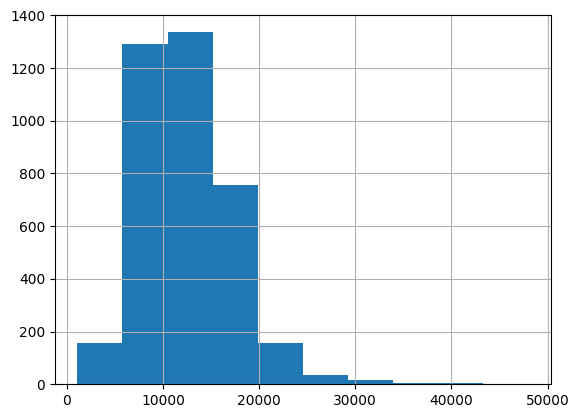

In [ ]:
train['price'].hist()

In [ ]:
display(train.isnull().sum())
display(test.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
y_train = train.pop("price")

## 수치형 활용

In [ ]:
cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
train = train[cols]
test = test[cols]

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, y_train, test_size=0.2, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((3007, 5), (752, 5), (3007,), (752,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5

In [ ]:
rmse(y_val, pred)

1565.0567336921324

## 수치형 + 범주형 활용

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
y_train = train.pop("price")

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
train.shape, test.shape

((3759, 30), (1617, 30))

In [ ]:
train.head(2)

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Fiesta,...,model_ Puma,model_ S-MAX,model_ Tourneo Connect,model_ Tourneo Custom,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,25013,150,53.3,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,30970,0,74.3,1.5,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, y_train, test_size=0.2, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((3007, 30), (752, 30), (3007,), (752,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)
rmse(y_val, pred)

1305.0293249093431

## Test 예측

In [ ]:
pred = rf.predict(test)
result = pd.DataFrame({
    'pred':pred
})
result.to_csv("result.csv", index=False)


In [ ]:
pd.read_csv('result.csv')

,pred
0,15434.26
1,15676.44
2,14335.40
3,18634.28
4,6329.75
...,...
1612,11524.45
1613,17570.62
1614,9965.65
1615,14391.21


In [ ]:
y = pd.read_csv("y.csv")
rmse(y, pred)

1433.9607407869184

In [ ]:
pred2 = pred.astype(int)
rmse(y, pred2)

1433.9775649471646